Lab 2: Exercise: Perform all data preprocessing tasks and feature selection on "Exercise-CarData.csv" Hint: Check
"na_values" attribute of pd.read()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/colab/Exercise-CarData.csv', na_values ='??'or '????' or "nan", dtype=object)

#label encoding of fuel type for handling missing values:


le = LabelEncoder()
data['FuelType'] = le.fit_transform(data['FuelType'])

data.head()
data.isnull().sum()

Unnamed: 0      0
Price           0
Age           100
KM             15
FuelType        0
HP              0
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

Handling missing values : Age

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


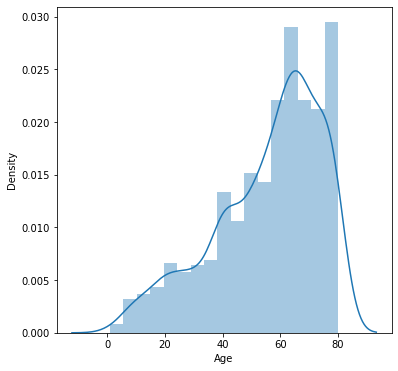

In [ ]:

fig, ax = plt.subplots(figsize = (6,6))
sns.distplot(data.Age)

In [ ]:
#replacing the missing values with median values 
# as graph shows tendency to one side

data['Age'].fillna(data['Age'].median(), inplace = True)

data.isnull().sum()

Unnamed: 0      0
Price           0
Age             0
KM             15
FuelType        0
HP              0
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

Handling  Missing values for FuelType

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


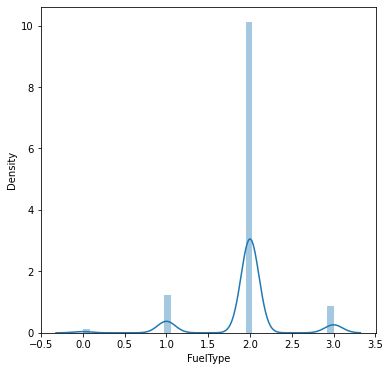

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
sns.distplot(data.FuelType)

Since outlier is here, it spoils mean value so we take median for missing values

In [ ]:
data['FuelType'].fillna(data['FuelType'].median(), inplace = True)
data.isnull().sum()

Unnamed: 0      0
Price           0
Age             0
KM             15
FuelType        0
HP              0
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

checking data distribution of MetColor for appropriate selection of imputation


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


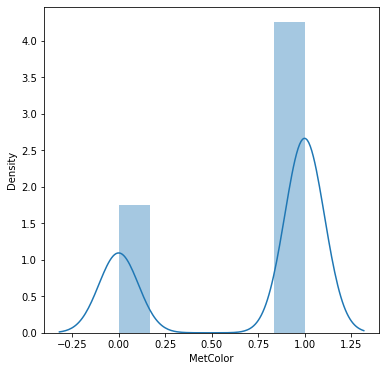

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
sns.distplot(data.MetColor)

NO outliers :  so we can use mode for imputations

In [ ]:
data['MetColor'].fillna(data['MetColor'].mode(), inplace = True)
data.isnull().sum()

Unnamed: 0     0
Price          0
Age            0
KM            15
FuelType       0
HP             0
MetColor       0
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

Only KM is having missing value. let's print data distribution of KM

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


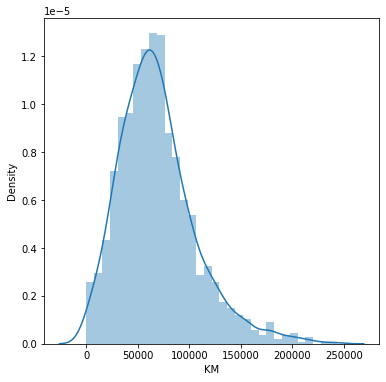

In [ ]:
fig,ax = plt.subplots(figsize = (6,6))
sns.distplot(data.KM)

here we can use imputation with mean / median of values as no outliers

In [ ]:
data['KM'].fillna(data['KM'].median(), inplace = True)
data.isnull().sum()

Unnamed: 0    0
Price         0
Age           0
KM            0
FuelType      0
HP            0
MetColor      0
Automatic     0
CC            0
Doors         0
Weight        0
dtype: int64

so now we have dataset with no missing value.
here part one : Handling missing value is complete

**Next Step is: Data Transformation : Scaling ( standardization )**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

#dataset we are using above data 

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

X_new = data.iloc[:,1:2].values
print("\n\nX for transformation : \n", X_new)


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)

std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)
print("\n\nStandard deviation  X : \n", X_std.std())




X for transformation : 
 [['13500']
 ['13750']
 ['13950']
 ...
 ['8500']
 ['7250']
 ['6950']]


Scaled X : 
 [[0.3250444 ]
 [0.3339254 ]
 [0.3410302 ]
 ...
 [0.14742451]
 [0.10301954]
 [0.09236234]]


Standardized X : 
 [[ 0.76376268]
 [ 0.83271485]
 [ 0.88787659]
 ...
 [-0.6152808 ]
 [-0.96004167]
 [-1.04278428]]


Standard deviation  X : 
 0.9999999999999999


Here Std is nearer to one which indicates data is scaled properly.


**Extra Practices:**

In [ ]:
#handling categorical data

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Step 2: Load Data
datasets = pd.read_csv('/content/drive/MyDrive/colab/Data_for_Categorical_Values.csv')
# print("\nData :\n",datasets)
# print("\nData statistics\n",datasets.describe())

# X = datasets.iloc[:, :-1].values
# to drop row with all null value

datasets.dropna(axis=0,how='all',inplace=True)
# print("\nNew Data :",datasets)



# dummy = pd.get_dummies(datasets['Country'])
# print("\n\nDummy :\n",dummy)
# datasets = datasets.drop(['Country','Purchased'],axis=1)
# datasets = pd.concat([dummy,datasets],axis=1)
# print("\n\nFinal Data :\n",datasets)


onehotencoder = OneHotEncoder();
x = onehotencoder.fit_transform(datasets.Country.values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(x, columns = ["Country_"+str(int(i)) for i in range(datasets.shape[1]-1)])
df = pd.concat([datasets, dfOneHot], axis=1) #column
#droping the country column
df= df.drop(['Country'], axis=1)
#printing to verify
print(df.head())


   Age  Salary Purchased  Country_0  Country_1  Country_2
0   44   72000        No        1.0        0.0        0.0
1   27   48000       Yes        0.0        0.0        1.0
2   30   54000        No        0.0        1.0        0.0
3   38   61000        No        0.0        0.0        1.0
4   40   68000       Yes        0.0        1.0        0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# Step 2: Load Data
datasets = pd.read_csv('/content/drive/MyDrive/colab/Data_for_Missing_Values.csv')
print("\nData :\n",datasets)
# print("\nData statistics\n",datasets.describe())

# All rows, all columns except last
X = datasets.iloc[:, :-1].values
# Only last column
Y = datasets.iloc[:, -1].values
# print("\n\nInput : \n", X)
# print("\n\nOutput: \n", Y)

# datasets.dropna(axis=0,how='all',inplace=True)
# print("\nNew Data :",datasets)

# datasets.dropna(axis=0,how='any',inplace=True)
# print("\nNew Data :",datasets)

updated_df = datasets;
updated_df['Age'] = updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()
print("fillna\n", updated_df)
updated_df = datasets;
updated_df['Salary'] = updated_df['Salary'].fillna(updated_df['Salary'].mean())
updated_df.info()
print("fillna", updated_df)
datasets




Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    11 non-null     object 
 1   Age        12 non-null     float64
 2   Salary     10 non-null     float64
 3   Purchased  11 non-null     object 
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes
fillna
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0   

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,NaN,39.4,62900.0,NaN
5,Germany,40.0,62900.0,Yes
6,France,35.0,58000.0,Yes
7,Spain,39.4,52000.0,No
8,France,48.0,79000.0,Yes
9,Germany,50.0,83000.0,No


Correlation: for Titanic Disaster 

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  
     PassengerId
0              1
1              2
2              3
3              4
4              5
..           ...
886          887
887          888
888          889
889          

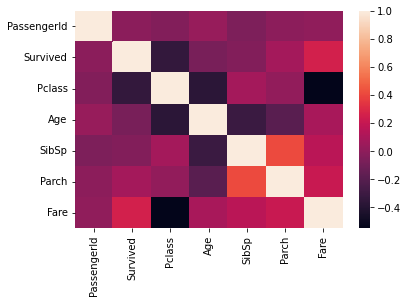

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

data  = pd.read_csv('/content/drive/MyDrive/colab/train.csv')
data = data.iloc[:, :-1]  
# print(data)

# data.info()

corr = data.corr()
corr.head()
print(corr)

sns.heatmap(corr)


columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False


# selected_columns = data.columns[columns]
selected_columns.shape

data = data[selected_columns]
print(data)
